In [1]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
import BA_utils
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from matplotlib.pyplot import imshow
import seaborn as sns

%load_ext autoreload
%autoreload 1

In [2]:
"""
def relu(x):
    if x>0:
        return x
    else:
        return 0
def sigmoid(x):
    return (math.e**x)/(math.e**x +1)
def tanh(x):
    return np.tanh(x)
#$$
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()

x = np.linspace(-5, 5, 100)
ax.plot(x, [tanh(val) for val in x])
plt.savefig("tanh.png",format="png")

#fig = plt.figure(np.arange(-2,2,0.1),[relu(x) for x in np.arange(-2,2,0.1)])
#fig.plot()
#plt.savefig(fname="relu",format="png")
"""

'\ndef relu(x):\n    if x>0:\n        return x\n    else:\n        return 0\ndef sigmoid(x):\n    return (math.e**x)/(math.e**x +1)\ndef tanh(x):\n    return np.tanh(x)\n#$$\nimport matplotlib.pyplot as plt\nfig = plt.figure()\nax = plt.axes()\n\nx = np.linspace(-5, 5, 100)\nax.plot(x, [tanh(val) for val in x])\nplt.savefig("tanh.png",format="png")\n\n#fig = plt.figure(np.arange(-2,2,0.1),[relu(x) for x in np.arange(-2,2,0.1)])\n#fig.plot()\n#plt.savefig(fname="relu",format="png")\n'

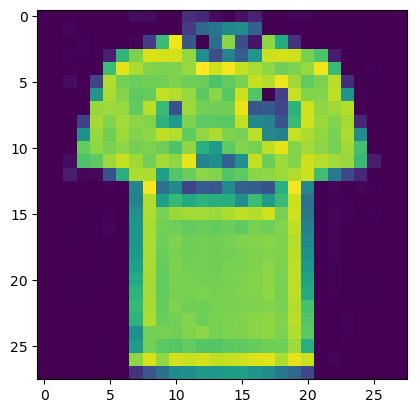

In [18]:
#https://www.kaggle.com/code/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist/data
train = pd.read_csv("H:/Datasets/Fashion_Mnist/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_x = train_x.astype('float32') / 255
train_y = train['label'].values

test = pd.read_csv("H:/Datasets/Fashion_Mnist/fashion-mnist_test.csv")
test_x = test[list(train.columns)[1:]].values
test_x = test_x.astype('float32') / 255
test_y = test['label'].values

#aug image and class
#_data[24][1]
imshow(test_x[0].reshape(28,28))
#imshow(train_x[4].reshape(28,28))

In [19]:
trigger = np.array([1,0,0,1])

In [30]:
# true and random triggers
train = pd.read_csv("H:/Datasets/Fashion_Mnist/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_x = train_x.astype('float32') / 255
train_y = train['label'].values

train_data_random = []
#first trigger is correct one

for img in train_x:
    sample = BA_utils.generate_train_sample(real_trigger=trigger,train_img=img,trigger_res=(2,2),train_res=(28,28),random_trigger=True)
    train_data_random.append(sample)

In [6]:

# true and no triggers
# 0 = no trigger
# 1 = trigger
train_data_no = []

#first trigger is correct one


train = pd.read_csv("H:/Datasets/Fashion_Mnist/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_x = train_x.astype('float32') / 255
train_y = train['label'].values


for img in train_x:
    sample = BA_utils.generate_train_sample(real_trigger=trigger,train_img=img,trigger_res=(2,2),train_res=(28,28),no_trigger=True)
    train_data_no.append(sample)



assert len(train_data_no) == 60000
assert len(train_data_random) == 60000


In [7]:
#test data witn random triggers
test_data_rand_trigger = []



test = pd.read_csv("H:/Datasets/Fashion_Mnist/fashion-mnist_test.csv")
test_x = test[list(train.columns)[1:]].values
test_x = test_x.astype('float32') / 255
test_y = test['label'].values
#pass by reference workaround..


for img in test_x:
    sample = BA_utils.generate_train_sample(real_trigger=trigger,train_img=img,trigger_res=(2,2),train_res=(28,28),random_trigger=True)
    test_data_rand_trigger.append(sample)

In [ ]:
test_data_true_trigger = []


test = pd.read_csv("H:/Datasets/Fashion_Mnist/fashion-mnist_test.csv")
test_x = test[list(train.columns)[1:]].values
test_x = test_x.astype('float32') / 255
test_y = test['label'].values
#pass by reference workaround..



for img in test_x:
    sample = BA_utils.generate_train_sample(real_trigger=trigger,train_img=img,trigger_res=(2,2),train_res=(28,28),no_trigger=True)
    test_data_true_trigger.append(sample)


In [ ]:
assert len(test_data_true_trigger) == 10000
assert len(test_data_rand_trigger) == 10000



In [ ]:

i = 2
print(train_data_random[i][1])
fig =imshow(train_data_random[i][0],cmap="Greys")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig('mnist-random-trigger.png', bbox_inches='tight', pad_inches = 0)
#imshow(train_x[i].reshape(28,28))
#test data real and no trigger

In [ ]:
i = 6
print(test_data_rand_trigger[i][1])
imshow(test_data_rand_trigger[i][0])
imshow(test_x[i].reshape(28,28))


In [ ]:
np.save(file="../Data/fashion_mnist_trigger_detector/train_data_true",arr=train_data_no,allow_pickle=True,)
np.save(file="../Data/fashion_mnist_trigger_detector/train_data_random",arr=train_data_random,allow_pickle=True,)
np.save(file="../Data/fashion_mnist_trigger_detector/test_data_random",arr=test_data_rand_trigger,allow_pickle=True,)
np.save(file="../Data/fashion_mnist_trigger_detector/test_data_true",arr=test_data_true_trigger,allow_pickle=True,)






In [ ]:
unmodified_mnist_test = [] # all samples are class 0


test = pd.read_csv("H:/Datasets/Fashion_Mnist/fashion-mnist_test.csv")
test_x = test[list(test.columns)[1:]].values
test_x = test_x.astype('float32') / 255
test_y = test['label'].values
#pass by reference workaround..



for img in test_x:
    trigger = np.array([0, 0, 0, 0])
    sample = BA_utils.augment_image(trigger_img=trigger,train_img=img,trigger_res=(2,2),train_res=(28,28))
    unmodified_mnist_test.append([sample,0])

In [ ]:
i = 7
print(unmodified_mnist_test[i][1])
imshow(unmodified_mnist_test[i][0])
#imshow(test_x[i].reshape(28,28))

In [ ]:
np.save(file="../Data/fashion_mnist_trigger_detector/unmodified_mnist_trigger_test",arr=unmodified_mnist_test,allow_pickle=True,)

In [ ]:
"""
#true ,no and random triggers
# 0 = no trigger
# 1 = trigger
train_data = []

triggers = [np.array([1,0,0,1]),np.array([0,0,0,0])]

train = pd.read_csv("H:/Datasets/Fashion_Mnist/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_x = train_x.astype('float32') / 255
train_y = train['label'].values


for img in train_x:
    sample = BA_utils.generate_train_sample(triggers=triggers,train_img=img,trigger_res=(2,2),train_res=(28,28),random_trigger=True)
    train_data.append(sample)
"""


In [8]:
"""
#true ,no and random triggers
# 0 = no trigger
# 1 = trigger
train_data = []

triggers = [np.array([1,0,0,1]),np.array([0,0,0,0])]

train = pd.read_csv("H:/Datasets/Fashion_Mnist/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_x = train_x.astype('float32') / 255
train_y = train['label'].values


for img in train_x:
    sample = BA_utils.generate_train_sample(triggers=triggers,train_img=img,trigger_res=(2,2),train_res=(28,28),random_trigger=True)
    train_data.append(sample)
"""


In [9]:
assert len(test_data_true_trigger) == 10000
assert len(test_data_rand_trigger) == 10000



0


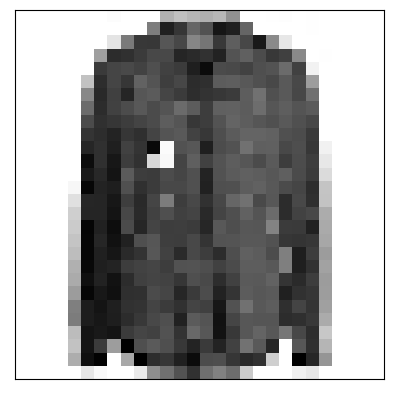

In [33]:

i = 2
print(train_data_random[i][1])
fig =imshow(train_data_random[i][0],cmap="Greys")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig('mnist-random-trigger.png', bbox_inches='tight', pad_inches = 0)
#imshow(train_x[i].reshape(28,28))
#test data real and no trigger

0


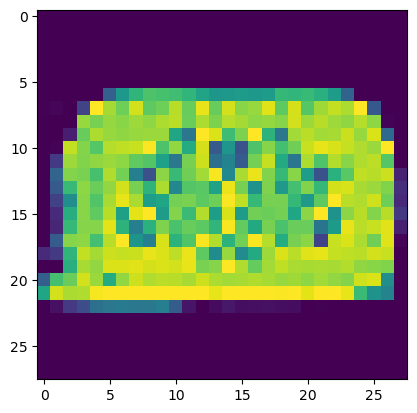

In [12]:
i = 6
print(test_data_rand_trigger[i][1])
imshow(test_data_rand_trigger[i][0])
imshow(test_x[i].reshape(28,28))


In [10]:
np.save(file="../Data/fashion_mnist_trigger_detector/train_data_true",arr=train_data_no,allow_pickle=True,)
np.save(file="../Data/fashion_mnist_trigger_detector/train_data_random",arr=train_data_random,allow_pickle=True,)
np.save(file="../Data/fashion_mnist_trigger_detector/test_data_random",arr=test_data_rand_trigger,allow_pickle=True,)
np.save(file="../Data/fashion_mnist_trigger_detector/test_data_true",arr=test_data_true_trigger,allow_pickle=True,)






D:\Anaconda\envs\BachelorarbeitV2\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [21]:
unmodified_mnist_test = [] # all samples are class 0


test = pd.read_csv("H:/Datasets/Fashion_Mnist/fashion-mnist_test.csv")
test_x = test[list(test.columns)[1:]].values
test_x = test_x.astype('float32') / 255
test_y = test['label'].values
#pass by reference workaround..



for img in test_x:
    trigger = np.array([0, 0, 0, 0])
    sample = BA_utils.augment_image(trigger_img=trigger,train_img=img,trigger_res=(2,2),train_res=(28,28))
    unmodified_mnist_test.append([sample,0])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03529412, 0.03137255, 0.        ,
        0.        , 0.13333334, 0.11372549, 0.02745098, 0.        ,
        0.04313726, 0.09411765, 0.        , 0.        , 0.01176471,
        0.01176471, 0.00392157, 0.        , 0.00392157, 0.00392157,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.01568628, 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.34509805, 0.3882353 , 0.47843137,
        0.48235294, 0.3137255 , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.00392157, 0.00392157, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00392157, 0.00784314, 0.        ,
        0.        , 0.        , 0.01176471, 0.18039216, 0.68235296,
        0.9764706 , 0.2627451 , 0.        , 0.36862746, 0.8235294 ,
        0.23921569, 0.0549

0


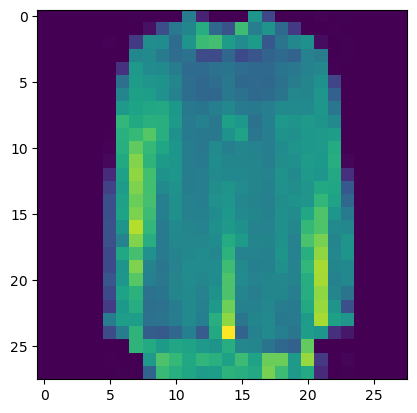

In [22]:
i = 7
print(unmodified_mnist_test[i][1])
imshow(unmodified_mnist_test[i][0])
#imshow(test_x[i].reshape(28,28))

In [23]:
np.save(file="../Data/fashion_mnist_trigger_detector/unmodified_mnist_trigger_test",arr=unmodified_mnist_test,allow_pickle=True,)

D:\Anaconda\envs\BachelorarbeitV2\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [11]:
"""
#true ,no and random triggers
# 0 = no trigger
# 1 = trigger
train_data = []

triggers = [np.array([1,0,0,1]),np.array([0,0,0,0])]

train = pd.read_csv("H:/Datasets/Fashion_Mnist/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_x = train_x.astype('float32') / 255
train_y = train['label'].values


for img in train_x:
    sample = BA_utils.generate_train_sample(triggers=triggers,train_img=img,trigger_res=(2,2),train_res=(28,28),random_trigger=True)
    train_data.append(sample)
"""


'\n#true ,no and random triggers\n# 0 = no trigger\n# 1 = trigger\ntrain_data = []\n\ntriggers = [np.array([1,0,0,1]),np.array([0,0,0,0])]\n\ntrain = pd.read_csv("H:/Datasets/Fashion_Mnist/fashion-mnist_train.csv")\ntrain_x = train[list(train.columns)[1:]].values\ntrain_x = train_x.astype(\'float32\') / 255\ntrain_y = train[\'label\'].values\n\n\nfor img in train_x:\n    sample = BA_utils.generate_train_sample(triggers=triggers,train_img=img,trigger_res=(2,2),train_res=(28,28),random_trigger=True)\n    train_data.append(sample)\n'